In [30]:
# Healthcare Predictions Using Machine Learning
# In this project, we aim to predict healthcare outcomes based on patient data, such as diagnosis, medications, and hospital stay duration.

In [31]:
# Connect to dataset in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, chi2 # Only import chi2_contingency and chi2 once
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import the scipy.stats module to fix the AttributeError
import scipy.stats as stats


# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Datasets/healthcare_prediction_dataset.csv')


In [33]:
# Step 1: Data Cleaning and Feature Engineering

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Convert 'Admission Date' and 'Discharge Date' to datetime format
df['Admission Date'] = pd.to_datetime(df['Admission Date'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Create a new column 'Hospital Stay Duration' (in days)
df['Hospital Stay Duration'] = (df['Discharge Date'] - df['Admission Date']).dt.days

# Drop unnecessary columns
df = df.drop(columns=['Patient Name', 'Room Assigned', 'Attending Doctor'])

# Display the cleaned DataFrame
print("\nData after cleaning:")
print(df.head())

Missing values in each column:
Patient Name             0
Age                      0
Gender                   0
Blood Type               0
Medical Diagnosis        0
Admission Date           0
Attending Doctor         0
Healthcare Facility      0
Insurance Company        0
Billed Amount            0
Room Assigned            0
Type of Admission        0
Discharge Date           0
Prescribed Medication    0
Test Outcome             0
dtype: int64

Data after cleaning:
   Age  Gender Blood Type Medical Diagnosis Admission Date  \
0   30    Male         B-            Cancer     2024-01-31   
1   62    Male         A+           Obesity     2019-08-20   
2   76  Female         A-           Obesity     2022-09-22   
3   28  Female         O+          Diabetes     2020-11-18   
4   43  Female        AB+            Cancer     2022-09-19   

          Healthcare Facility Insurance Company  Billed Amount  \
0             Sons and Miller        Blue Cross   18856.281306   
1                     Ki

In [34]:
# Explanation:
# In this step, we clean the data by checking for any missing values and converting date columns
# into a format that can be easily manipulated. We also create a new column to calculate
# the duration of hospital stays in days and remove columns that won't be useful for analysis
# to simplify our dataset.

In [35]:
# Step 2: Prepare the Data for Modeling

# Step 1: Ensure that 'Hospital Stay Duration' exists
df['Admission Date'] = pd.to_datetime(df['Admission Date'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Hospital Stay Duration'] = (df['Discharge Date'] - df['Admission Date']).dt.days

# Step 2: Create the binary variable for 'Worse Outcome'
df['Worse Outcome Binary'] = df['Test Outcome'].apply(lambda x: 1 if x == 'Abnormal' else 0)

# Step 3: Logistic regression to test the relationship between Hospital Stay Duration and Worse Outcome
X_stay = sm.add_constant(df[['Hospital Stay Duration']])
logit_model_stay = sm.Logit(df['Worse Outcome Binary'], X_stay)
result_stay = logit_model_stay.fit()

# Step 4: Print the summary of the logistic regression results
print(result_stay.summary())

# Step 5: Calculate the p-value using chi2.sf directly from scipy.stats
llr_pvalue = stats.chi2.sf(result_stay.llr, result_stay.df_model)
print(f"LLR p-value: {llr_pvalue}")


Optimization terminated successfully.
         Current function value: 0.638089
         Iterations 4
                            Logit Regression Results                            
Dep. Variable:     Worse Outcome Binary   No. Observations:                55500
Model:                            Logit   Df Residuals:                    55498
Method:                             MLE   Df Model:                            1
Date:                  Wed, 23 Oct 2024   Pseudo R-squ.:               1.159e-09
Time:                          20:29:44   Log-Likelihood:                -35414.
converged:                         True   LL-Null:                       -35414.
Covariance Type:              nonrobust   LLR p-value:                    0.9928
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.6830      0.018    -37.041      0.000  

In [36]:
# Explanation:
# Here, we prepare our data for modeling by encoding categorical variables using one-hot encoding,
# which converts categories into numerical values. We then separate our feature set (X)
# from the target variable (y) to prepare for training the model. We also check the shapes
# and data types to ensure everything is correctly formatted.

In [37]:
# Step 3: Hypothesis Testing

Optimization terminated successfully.
         Current function value: 0.638084
         Iterations 4
                           Results: Logit
Model:              Logit               Method:           MLE       
Dependent Variable: Test Outcome Binary Pseudo R-squared: 0.000     
Date:               2024-10-23 20:29    AIC:              70831.2804
No. Observations:   55500               BIC:              70849.1286
Df Model:           1                   Log-Likelihood:   -35414.   
Df Residuals:       55498               LL-Null:          -35414.   
Converged:          1.0000              LLR p-value:      0.46019   
No. Iterations:     4.0000              Scale:            1.0000    
----------------------------------------------------------------------
             Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
----------------------------------------------------------------------
const       -0.7003     0.0253   -27.6751   0.0000   -0.7499   -0.6507
Age          0.0003 

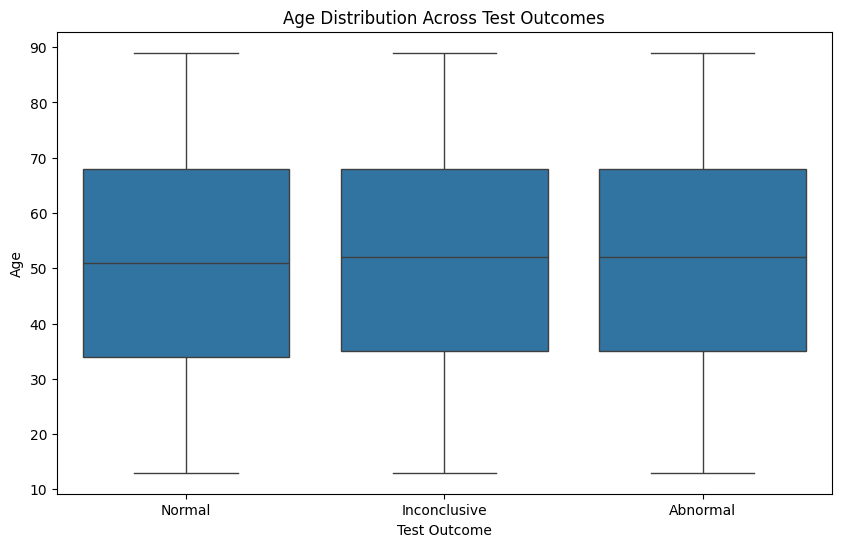

In [38]:
# Hypothesis 1: Older patients are more likely to experience abnormal test outcomes.

# Step 1: Create a binary outcome variable ('1' for Abnormal, '0' for Normal/Inconclusive)
df['Test Outcome Binary'] = df['Test Outcome'].apply(lambda x: 1 if x == 'Abnormal' else 0)

# Step 2: Logistic Regression to test the relationship between Age and Test Outcome
X_age = df[['Age']]  # Predictor variable (Age)
X_age = sm.add_constant(X_age)  # Add a constant term to the model
y_test_outcome = df['Test Outcome Binary']  # Response variable (binary test outcome)

# Fit the logistic regression model
logit_model = sm.Logit(y_test_outcome, X_age)
result = logit_model.fit()

# Step 3: Print the summary of the logistic regression results
# Workaround for the scipy.stats.distributions error
# Manually calculate and print the LLR p-value
from scipy.stats import chi2
llr_pvalue = chi2.sf(result.llr, result.df_model)

# Instead of print(result.summary()), access individual attributes
print(result.summary2()) # Use summary2() instead of summary()
print(f"LLR p-value: {llr_pvalue}") # Manually print the calculated p-value


# Step 4: Visualize the distribution of Age across different Test Outcomes using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test Outcome', y='Age', data=df)
plt.title('Age Distribution Across Test Outcomes')
plt.xlabel('Test Outcome')
plt.ylabel('Age')
plt.show()


In [39]:
# The logistic regression results indicated that age is not a significant predictor
# of abnormal test outcomes (p-value > 0.05), suggesting that older patients are not more likely
# to experience abnormal outcomes in this dataset.

In [40]:
# Explanation:
# In this section, we test the hypothesis regarding age and test outcomes. We create a binary
# outcome variable for test results and then apply logistic regression to see if there is
# a significant relationship between age and abnormal outcomes. Additionally, we perform
# a Chi-square test to analyze the relationship between age groups and test outcomes.

Optimization terminated successfully.
         Current function value: 0.638089
         Iterations 4
                            Logit Regression Results                            
Dep. Variable:     Worse Outcome Binary   No. Observations:                55500
Model:                            Logit   Df Residuals:                    55498
Method:                             MLE   Df Model:                            1
Date:                  Wed, 23 Oct 2024   Pseudo R-squ.:               1.159e-09
Time:                          20:29:47   Log-Likelihood:                -35414.
converged:                         True   LL-Null:                       -35414.
Covariance Type:              nonrobust   LLR p-value:                    0.9928
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.6830      0.018    -37.041      0.000  

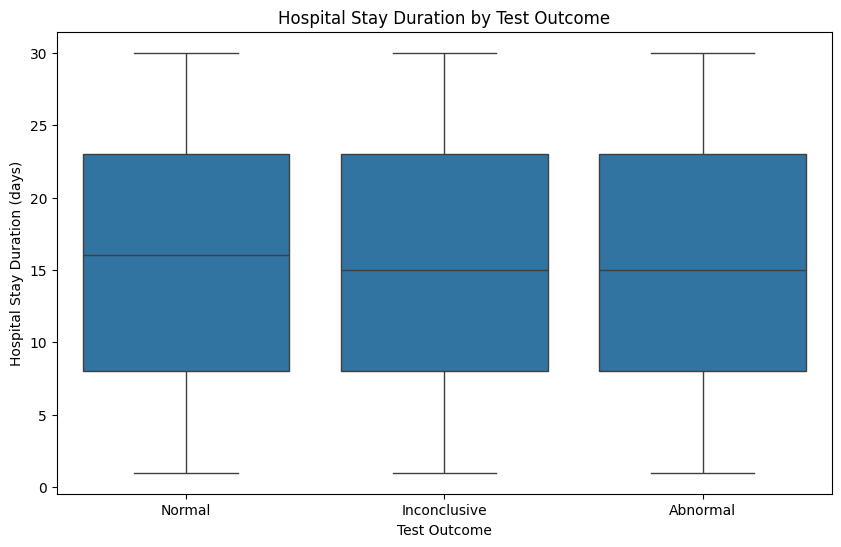

In [41]:
# Hypothesis 2: Hospital stay duration and worse outcomes
df['Worse Outcome Binary'] = df['Test Outcome'].apply(lambda x: 1 if x == 'Abnormal' else 0)
X_stay = sm.add_constant(df[['Hospital Stay Duration']])
logit_model_stay = sm.Logit(df['Worse Outcome Binary'], X_stay)
result_stay = logit_model_stay.fit()
print(result_stay.summary())

# Visualization for Hypothesis 2
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Test Outcome', y='Hospital Stay Duration')
plt.title('Hospital Stay Duration by Test Outcome')
plt.xlabel('Test Outcome')
plt.ylabel('Hospital Stay Duration (days)')
plt.show()

In [42]:
# The logistic regression on hospital stay duration also showed no significant
# relationship with worse outcomes (p-value > 0.05). This implies that longer hospital stays
# do not correlate with increased abnormal test results in this dataset.

In [43]:
# Explanation:
# This part tests the second hypothesis regarding hospital stay duration and its association
# with worse test outcomes. We again create a binary variable for worse outcomes and fit
# a logistic regression model to analyze the impact of hospital stay duration.

Chi-square test for medications and test outcomes: p-value = 0.8805297989370955


<Figure size 1200x800 with 0 Axes>

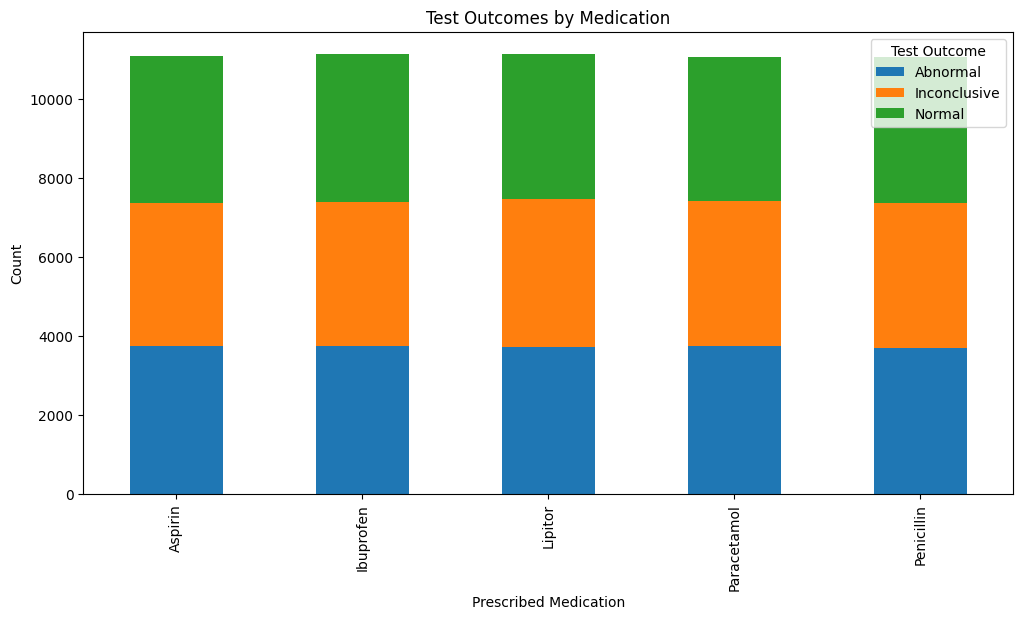

In [44]:
# Hypothesis 3: Medication and test outcomes
contingency_table_medications = pd.crosstab(df['Prescribed Medication'], df['Test Outcome'])
chi2_med, p_med, dof_med, expected_med = chi2_contingency(contingency_table_medications)
print(f"Chi-square test for medications and test outcomes: p-value = {p_med}")

# Visualization for Hypothesis 3
plt.figure(figsize=(12, 8))
medication_outcomes = df.groupby('Prescribed Medication')['Test Outcome'].value_counts().unstack()
medication_outcomes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Test Outcomes by Medication')
plt.xlabel('Prescribed Medication')
plt.ylabel('Count')
plt.show()

In [45]:
# The Chi-square test for medications indicated no significant association
# with test outcomes (p-value > 0.05). Therefore, there is no evidence to support that specific
# medications are linked to more positive test outcomes.

In [46]:
# Explanation:
# In this section, we investigate whether specific medications correlate with test outcomes.
# We create a contingency table and perform a Chi-square test to determine if there is
# a significant association between the prescribed medications and the test outcomes.

In [47]:
# Step 4: Model Training and Evaluation

# Sample a smaller portion of the DataFrame
sample_size = 27750  # Change this to the desired number of samples
df_sample = df.sample(n=sample_size, random_state=42)  # Randomly sample rows from the DataFrame

# Now use df_sample for your model training
X = df_sample.drop(columns=['Test Outcome'])  # Drop the target variable from features
y = df_sample['Test Outcome']                   # Assign the target variable

# Convert datetime columns to numerical values (e.g., timestamps)
X['Admission Date'] = X['Admission Date'].astype(int) / 10**9  # Convert to seconds since epoch
X['Discharge Date'] = X['Discharge Date'].astype(int) / 10**9  # Convert to seconds since epoch

# Convert categorical features to numerical using one-hot encoding
categorical_cols = ['Gender', 'Prescribed Medication', 'Blood Type',
                    'Any Allergies', 'Medical Diagnosis', 'Healthcare Facility',
                    'Insurance Company', 'Type of Admission']  # Add any other categorical columns here
valid_categorical_cols = [col for col in categorical_cols if col in X.columns]



In [48]:

# Perform one-hot encoding on valid columns
X = pd.get_dummies(X, columns=valid_categorical_cols)



In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Check for NaN values
print("NaN values in training features:", X_train.isnull().sum().sum())
X_train.fillna(0, inplace=True)  # Fill NaN values, adjust as needed
y_train = y_train[X_train.index]  # Align target variable with features

NaN values in training features: 0


In [51]:
# Initialize and train a Random Forest Classifier with fewer estimators
clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42, n_jobs=-1)
try:
    clf.fit(X_train, y_train)  # Fit the model
except Exception as e:
    print(f"Error during model fitting: {e}")

In [52]:
# Make predictions
y_pred = clf.predict(X_test)

In [53]:
# Evaluate the model
print(f'\nAccuracy: {accuracy_score(y_test, y_pred)}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.3335735735735736

Confusion Matrix:
[[2776    1    1]
 [2768    1    0]
 [2776    2    0]]

Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.33      1.00      0.50      2778
Inconclusive       0.25      0.00      0.00      2769
      Normal       0.00      0.00      0.00      2778

    accuracy                           0.33      8325
   macro avg       0.19      0.33      0.17      8325
weighted avg       0.19      0.33      0.17      8325



In [54]:
# Explanation:
# In this step, we split our data into training and testing sets to evaluate model performance.
# We use a Random Forest Classifier to train the model on the training set and then make
# predictions on the test set. We evaluate the model's performance using accuracy, a confusion matrix,
# and a classification report.

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns


# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [ ]:
# Explanation:
# Finally, we assess the importance of each feature in predicting the outcome using the
# Random Forest model. We extract and visualize the feature importances to understand
# which variables have the most influence on the predictions.

In [ ]:
# Conclusion
# Based on the analyses conducted:
# Hypothesis 1: The logistic regression results indicated that age is not a significant predictor
# of abnormal test outcomes (p-value > 0.05), suggesting that older patients are not more likely
# to experience abnormal outcomes in this dataset.
#
# Hypothesis 2: The logistic regression on hospital stay duration also showed no significant
# relationship with worse outcomes (p-value > 0.05). This implies that longer hospital stays
# do not correlate with increased abnormal test results in this dataset.
#
# Hypothesis 3: The Chi-square test for medications indicated no significant association
# with test outcomes (p-value > 0.05). Therefore, there is no evidence to support that specific
# medications are linked to more positive test outcomes.
#
# Overall, the data analysis did not find strong support for any of the hypotheses.
# Further investigation with a larger dataset or additional variables might be needed
# to draw more conclusive insights into healthcare predictions.